In [17]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.stats import linregress
warnings.simplefilter("ignore")
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.grid'] = True

In [110]:
# running this cell will load the KNMI data for you in a dataframe which you may use
df_Rainfall = pd.read_csv(
    'Precipitation_data_79-23.csv', delimiter=';', index_col=[0], parse_dates=True)
    
# df_Rainfall.index.name = "Date"
df_Rainfall.index = pd.to_datetime(df_Rainfall.index, dayfirst=True)
df_Rainfall.rename(columns={'(mm) Precipitation (ERA5_AG) at CE_ID_0, 1979-01-01 to 2023-12-31': 'RH'}, inplace=True)

print(df_Rainfall[0:32])
# df_Rainfall['RH'].plot()

df2 = pd.read_csv('Evaporation_data_79-23.csv', delimiter=';', skiprows=1, header=None)
column_names = ['Date', 'POT_EV']
df2.columns = column_names
df2["Date"] = pd.to_datetime(df2['Date'], dayfirst = True)
df2["POT_EV"] = df2["POT_EV"].astype(float)
df2.set_index('Date', inplace=True)

df3 = pd.read_csv('Precip_RCP85_25-50.txt', delimiter=r'\s+', skiprows=33, header=None)
df3.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul",'Aug', 'Sep', 'Oct', 'Nov', 'Dec']



df4 = pd.read_csv('Precip_RCP85_99-24.txt', delimiter=r'\s+', skiprows=33, header=None)
df4.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul",'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df5 = pd.read_csv('Precip_RCP26_25-50.txt', delimiter=r'\s+', skiprows=33, header=None)
df5.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul",'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df6 = pd.read_csv('Precip_RCP26_25-50_true.txt', delimiter=r'\s+', skiprows=33, header=None)
df6.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul",'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

                 RH
1979-01-01   1.2972
1979-01-02   0.1156
1979-01-03   2.6033
1979-01-04   0.0000
1979-01-05   0.0000
1979-01-06   0.0000
1979-01-07   0.2912
1979-01-08   3.5096
1979-01-09   0.0800
1979-01-10   0.0000
1979-01-11   0.1644
1979-01-12   1.1945
1979-01-13   3.1601
1979-01-14   7.3998
1979-01-15   0.9378
1979-01-16   0.2154
1979-01-17   0.2278
1979-01-18   0.0789
1979-01-19   3.0565
1979-01-20  12.0858
1979-01-21  17.6340
1979-01-22   0.7266
1979-01-23   0.0378
1979-01-24   0.0078
1979-01-25   0.0000
1979-01-26   0.0000
1979-01-27   0.0000
1979-01-28   0.0000
1979-01-29   0.0566
1979-01-30   2.3668
1979-01-31   0.3511
1979-02-01   0.0078


In [107]:
df

,Date,PRCP
0,1979-01-01,1.2972
1,1979-01-02,0.1156
2,1979-01-03,2.6033
3,1979-01-04,0.0000
4,1979-01-05,0.0000
...,...,...
16427,2023-12-27,2.2219
16428,2023-12-28,0.9390
16429,2023-12-29,13.8933
16430,2023-12-30,0.0178


In [78]:
df4

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1999,2.746299,2.980046,2.863973,2.245828,1.869911,1.708007,1.559313,1.379854,1.333746,1.469310,1.812889,2.318282
1,2000,2.806763,2.946142,2.777776,2.253708,1.907722,1.770818,1.589943,1.357660,1.298655,1.423789,1.772381,2.313383
2,2001,2.793630,3.044098,2.809296,2.279133,1.854206,1.740266,1.532681,1.405642,1.280979,1.479883,1.795496,2.246956
3,2002,2.702489,2.945315,2.791295,2.268575,1.937155,1.684813,1.487471,1.388960,1.291796,1.447871,1.852563,2.263761
4,2003,2.756239,3.095615,2.827241,2.318321,1.969682,1.714249,1.565562,1.392462,1.265445,1.487829,1.799138,2.312095
5,2004,2.807964,2.943264,2.776613,2.302210,1.917384,1.772566,1.562594,1.390532,1.310172,1.459324,1.756920,2.243384
6,2005,2.781071,3.070797,2.788345,2.256246,1.912327,1.743505,1.570634,1.393764,1.312750,1.424449,1.801600,2.257587
7,2006,2.650607,3.072986,2.716369,2.244911,1.920979,1.731884,1.585076,1.353133,1.287994,1.455762,1.803277,2.232018
8,2007,2.770641,3.024180,2.856704,2.312388,1.890615,1.741784,1.592541,1.392417,1.313508,1.469674,1.739481,2.258086
9,2008,2.797236,3.036929,2.846421,2.280607,1.921602,1.762931,1.564525,1.390347,1.297292,1.404988,1.792874,2.221240


In [94]:
df_monthly = df['PRCP'].resample('M').mean()

In [111]:
# Resample daily data to mean monthly values
Precip_Per_Month_mean = df_Rainfall['RH'].resample("M").mean()

# Filter the data to include only the years from 1998 to 2023
precip_filtered = Precip_Per_Month_mean['1998':'2023']

# Create a DataFrame where each year is a row and each month is a column
# Group by year and month, and pivot the months into columns
df_precip_monthly = precip_filtered.to_frame().reset_index()
df_precip_monthly['Year'] = df_precip_monthly['index'].dt.year
df_precip_monthly['Month'] = df_precip_monthly['index'].dt.month

# Pivot the data to get the desired format with months as columns
df_precip_pivot = df_precip_monthly.pivot(index='Year', columns='Month', values='RH')

# Rename the columns for clarity
df_precip_pivot.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Optional: Reset index if you want the 'Year' to be a column and not the index
df_precip_pivot.reset_index(inplace=True)

# Display the DataFrame
display(df_precip_pivot)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1998,4.146042,0.496996,0.625358,0.047077,0.002081,0.005817,0.106452,0.111855,0.109827,1.315677,3.744770,4.174545
1,1999,3.799952,2.263750,0.761581,0.260053,0.252539,0.030227,0.214471,0.064032,0.242613,1.003481,2.446227,2.340103
2,2000,8.835406,9.576862,3.105429,0.683953,0.702500,0.906553,0.113835,0.030184,0.170770,0.368352,1.532097,1.417068
3,2001,0.288071,5.617800,1.442481,0.521437,0.354652,0.132670,0.049174,0.013548,0.412373,0.503910,3.716723,3.336971
4,2002,0.380439,0.947846,0.511358,1.088453,0.058203,0.382960,0.077300,0.092616,0.284850,0.290171,0.301817,0.848994
5,2003,0.693145,1.164921,0.951194,0.076603,0.120523,1.136133,0.041858,0.018855,0.091897,1.759061,0.613733,2.160090
6,2004,1.529294,3.330069,2.447629,0.341873,0.032287,0.064027,0.039713,0.130042,0.017113,0.439900,0.501623,2.915058
7,2005,1.960819,1.544182,0.752984,0.333640,0.045626,0.048260,0.024619,0.025629,0.010853,0.058655,1.147720,1.890806
8,2006,3.115132,3.909950,2.815542,0.162400,0.109132,0.036380,0.058958,0.017352,0.072543,0.163177,1.857847,1.397590
9,2007,0.826300,0.724286,1.554303,0.612880,0.008529,0.264163,0.122332,0.069681,1.732740,0.673100,2.809423,5.569094


In [114]:
RCP85_old = df_precip_pivot.mean()
RCP85_new = df3.mean()
factor85 = RCP85_new / RCP85_old
factor85

Year     1.013429
Jan      1.570445
Feb      1.353872
Mar      1.825557
Apr      2.521623
May      5.523226
Jun      3.109249
Jul      5.631911
Aug     12.192492
Sep      3.200349
Oct      3.446686
Nov      2.172946
Dec      1.697722
dtype: float64

In [61]:
df_monthly

Date
1979-01-31    1.858019
1979-02-28    0.889811
1979-03-31    1.454642
1979-04-30    0.092907
1979-05-31    0.272177
                ...   
2023-08-31    0.048845
2023-09-30    0.140583
2023-10-31    0.557106
2023-11-30    0.307197
2023-12-31    3.772455
Freq: M, Name: PRCP, Length: 540, dtype: float64

<Axes: xlabel='Date'>

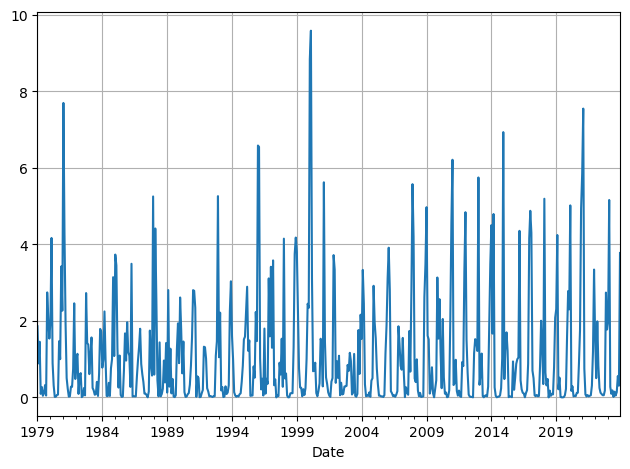

In [62]:
df_monthly.plot()

In [63]:
df2_monthly = df2['POT_EV'].resample('M').mean()

<Axes: xlabel='Date'>

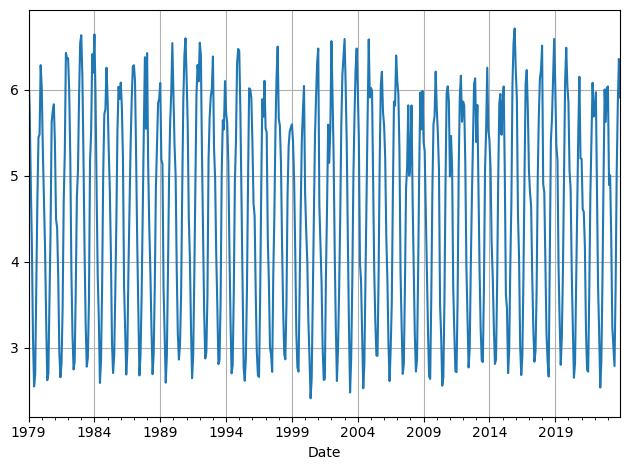

In [64]:
df2_monthly.plot()

In [91]:
df['PRCP']

Date
1979-01-01     1.2972
1979-01-02     0.1156
1979-01-03     2.6033
1979-01-04     0.0000
1979-01-05     0.0000
               ...   
2023-12-27     2.2219
2023-12-28     0.9390
2023-12-29    13.8933
2023-12-30     0.0178
2023-12-31     0.0222
Name: PRCP, Length: 16432, dtype: float64

### Real things happening below

In [127]:
rcp85old = df4.mean()
rcp85new = df3.mean()

In [128]:
rcp85new

Year    2037.500000
Jan        4.788567
Feb        3.697300
Mar        2.411781
Apr        1.359423
May        0.882247
Jun        0.527852
Jul        0.461414
Aug        0.498709
Sep        0.773879
Oct        1.806036
Nov        3.628438
Dec        4.938531
dtype: float64

In [129]:
factor85 = rcp85new / rcp85old

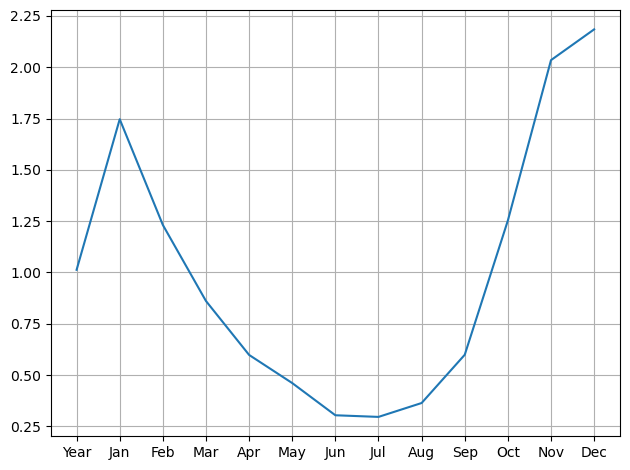

In [130]:
plt.plot(factor85)

### Dry vs Wet days

OG

In [120]:
length_wet = len(df_Rainfall['RH'][df_Rainfall['RH']>5])
ratio_wet = length_wet / (len(df_Rainfall['RH']))
print(ratio_wet)    

0.058179162609542354


In [123]:
length_dry = len(df_Rainfall['RH'][df_Rainfall['RH']<=5])
ratio_dry = length_dry / (len(df_Rainfall['RH']))
print(ratio_dry)

0.9418208373904576


In [131]:
df_Rainfall

,RH
1979-01-01,1.2972
1979-01-02,0.1156
1979-01-03,2.6033
1979-01-04,0.0000
1979-01-05,0.0000
...,...
2023-12-27,2.2219
2023-12-28,0.9390
2023-12-29,13.8933
2023-12-30,0.0178


Implement factor

In [134]:
df_fut = pd.read_csv('Precip_SSP85_25-50.txt', delimiter=r'\s+', skiprows=59, header=None)
df_fut.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul",'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_past = pd.read_csv('Precip_ssp85-99-24.txt', delimiter=r'\s+', skiprows=59, header=None)
df_past.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', "Jul",'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [135]:
fut_mean = df_fut.mean()
past_mean = df_past.mean()
factorssp85 = fut_mean / past_mean

In [136]:
factorssp85

Year    1.012926
Jan     1.054429
Feb     1.011960
Mar     0.998365
Apr     0.866270
May     0.849099
Jun     1.076222
Jul     0.842678
Aug     0.862629
Sep     0.704302
Oct     0.906030
Nov     1.003001
Dec     1.054868
dtype: float64

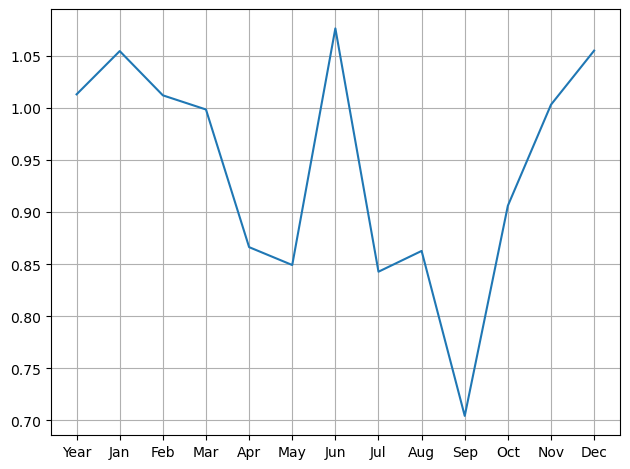

In [137]:
plt.plot(factorssp85)